<a href="https://colab.research.google.com/github/avinod769141-tech/ice-cream-_revenue_repo/blob/main/Copy_of_ybi_foudation_business_data_analytics_project_submsssion%3CVINOD%3E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TITLE OF PROJECT - ICECREAM REVENUE Prediction

OBJECTIVE -  I want to understand how sales change when the weather gets colder or hotter.

Using the dataset, I will:

1. Look at the relationship between temperature and revenue
2. to Check whether revenue generally increases on warmer days
3. where to Build a simple prediction model that can estimate future revenue if we know the temperature for upcoming days
Why it matters:
If we can predict revenue based on temperature, an ice cream shop (or business) can plan better—for example:

1. where we must keep more stock ready on hot days,
2. to arrange extra staff when demand is expected to be high,
3. where to  avoid wasting inventory on cooler days when sales may be lower.

DATA SOURCE - KAGGLE DATASET. LINK- https://www.kaggle.com/datasets/saliltirodkar/ice-cream-sales-analysis-temperature-and-weather

IMPORTED LIBRARY -

In [ ]:
import pandas as pd
import numpy as np
import glob
import os
import gdown
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

load the dataset(dataset is imported from google drive)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
FOLDER_URL = "https://drive.google.com/drive/folders/1QfXL_IlvDYPtZLCRVuM_5inrsq26hkmv?usp=drive_link"

# where Download everything inside the folder into a local folder named "mydata"
gdown.download_folder(url=FOLDER_URL, output="mydata", quiet=False)

print("Folder downloaded into: mydata/")

Retrieving folder contents


Processing file 1fKOMQonh1U-DnmgU1X2bDaX0vzpfhEM8 IceCreamData.csv


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1fKOMQonh1U-DnmgU1X2bDaX0vzpfhEM8
To: /content/mydata/IceCreamData.csv
100%|██████████| 12.4k/12.4k [00:00<00:00, 22.4MB/s]

Folder downloaded into: mydata/



Download completed


In [ ]:
import pandas as pd
import numpy as np
import glob
import os
import gdown
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data cleaning

In [ ]:

# Find the CSV file inside mydata folder (there is only one file)
print("Contents of /content/mydata/:", os.listdir('/content/mydata'))
csv_files = glob.glob("/content/mydata/**/*.csv", recursive=True)

if len(csv_files) == 0:
    raise FileNotFoundError("No CSV file found in /content/mydata/. Run the download cell again.")

CSV_PATH = csv_files[0]
print("Using file:", CSV_PATH)

df = pd.read_csv(CSV_PATH)

print("Loaded successfully!")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

df.head()

Contents of /content/mydata/: ['IceCreamData.csv']
Using file: /content/mydata/IceCreamData.csv
Loaded successfully!
Shape: (500, 2)
Columns: ['Temperature', 'Revenue']


,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [ ]:

TEMP_COL = "Temperature"
REV_COL  = "Revenue"
df2 = df[[TEMP_COL, REV_COL]].copy()
df2 = df2.dropna()

# Convert to numeric (if there is any text, it becomes NaN)
df2[TEMP_COL] = pd.to_numeric(df2[TEMP_COL], errors="coerce")
df2[REV_COL]  = pd.to_numeric(df2[REV_COL], errors="coerce")

df2 = df2.dropna()

print("Cleaned shape:", df2.shape)
df2.head()

Cleaned shape: (500, 2)


,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


 plot (to show relationship)

In [ ]:
import pandas as pd
import numpy as np
import glob
import os
import gdown
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

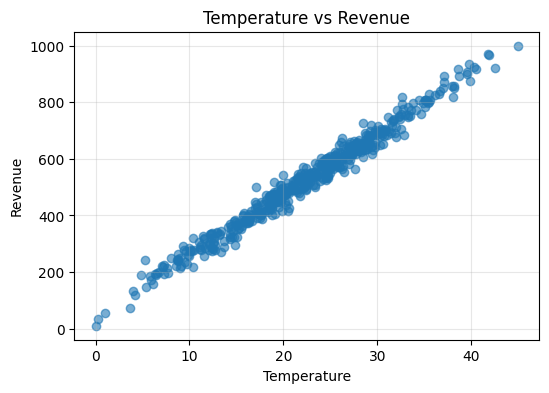

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(df2[TEMP_COL], df2[REV_COL], alpha=0.6)
plt.title("Temperature vs Revenue")
plt.xlabel(TEMP_COL)
plt.ylabel(REV_COL)
plt.grid(True, alpha=0.3)
plt.show()

 Training  a simple prediction model (Linear Regression)

In [ ]:
import pandas as pd
import numpy as np
import glob
import os
import gdown
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:

X = df2[[TEMP_COL]]   # feature
y = df2[REV_COL]      # target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])
print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²  :", r2_score(y_test, y_pred))

Intercept: 46.80464127742374
Slope: 21.38197385529505
MAE : 19.184547408370435
RMSE: 25.544472225864705
R²  : 0.9771532792713993


In [ ]:
import pandas as pd
import numpy as np
import glob
import os
import gdown
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
future_temps = pd.DataFrame({TEMP_COL: [10, 15, 20, 25, 30, 35, 40,50,60,70,80,90,100]})  # change values if you want
future_temps["predicted_revenue"] = model.predict(future_temps)

future_temps

,Temperature,predicted_revenue
0,10,260.624380
1,15,367.534249
2,20,474.444118
3,25,581.353988
4,30,688.263857
5,35,795.173726
6,40,902.083595
7,50,1115.903334
8,60,1329.723073
9,70,1543.542811


end project